<a href="https://colab.research.google.com/github/varshum12/Deep-Learning-23sep-2025-weekday/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

In [2]:
(x_train , y_train) ,  (x_test , y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
type(x_train)

numpy.ndarray

In [10]:
import matplotlib.pyplot as plt


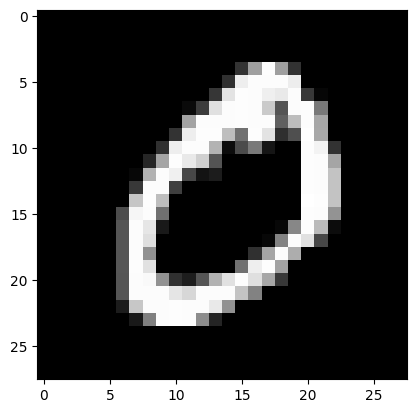

In [11]:
plt.imshow(x_train[1] ,  cmap = 'gray' )

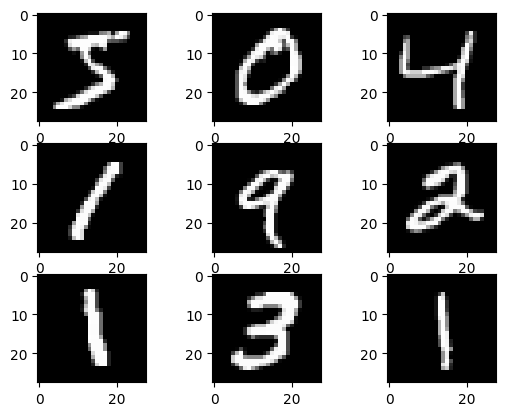

In [12]:
#  first 9 images
for  i  in range(9):
  plt.subplot(  3,3, i+1)
  plt.imshow(x_train[i] ,  cmap  = 'gray')

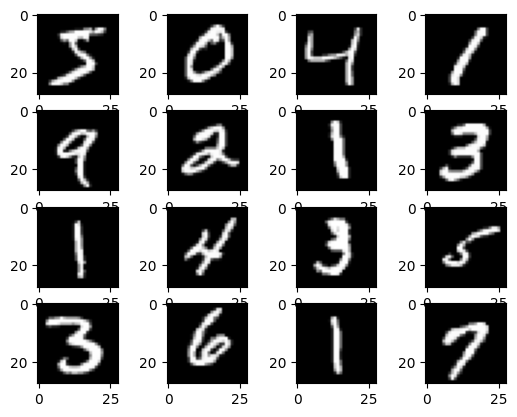

In [13]:
#  first 9 images
for  i  in range(16):
  plt.subplot(  4,4, i+1)
  plt.imshow(x_train[i] ,  cmap  = 'gray')

In [14]:
# preprocessing
x_train1  =  x_train/255
x_test1  =  x_test/255

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
from keras.utils  import  to_categorical

In [21]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
y_train.shape

(60000,)

In [24]:
y_train1.shape

(60000, 10)

In [18]:
y_train1  = to_categorical(y_train)
y_test1 =  to_categorical(y_test)

In [20]:
y_train1

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [25]:
y_train1.shape

(60000, 10)

In [ ]:
#  create  ARCHITECHTURE

In [26]:
from  keras.models import Sequential
from keras.layers import Dense  , BatchNormalization , Conv2D ,  MaxPool2D , Flatten , Dropout

In [27]:
nn  =  Sequential()

##  ADD CNN  LAYERS
nn.add(Conv2D( filters =  16,
              kernel_size= (3 ,3),
              input_shape  =  (28 , 28  ,  1)))

nn.add(MaxPool2D(pool_size= (2 ,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

##  ADD CNN  LAYERS
nn.add(Conv2D( filters =  16,
              kernel_size= (3 ,3),
             ))

nn.add(MaxPool2D(pool_size= (2 ,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

##  ADD CNN  LAYERS
nn.add(Conv2D(filters =  16  ,
              kernel_size= (3 ,3),
              ))

nn.add(MaxPool2D(pool_size= (2 ,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))


##  add flatten layer
nn.add(Flatten())

##  add  hidden layers
nn.add(Dense(1000 ,  activation =  'relu'))
nn.add(Dropout(0.3))

nn.add(Dense(1000 ,  activation =  'relu'))
nn.add(Dropout(0.3))

nn.add(Dense(1000 ,  activation =  'relu'))
nn.add(Dropout(0.3))

nn.add(Dense(10 , activation  = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
from  keras.callbacks import EarlyStopping
es  =  EarlyStopping(patience= 5  ,  monitor = 'val_loss')

In [29]:
# compile  data
nn.compile(optimizer = 'adam' ,  loss = 'categorical_crossentropy' , metrics  =['accuracy'] ,
           )

In [30]:
x_train1.shape

(60000, 28, 28)

In [31]:
y_train1.shape

(60000, 10)

In [32]:
## fit
hist  =  nn.fit(x_train1  ,  y_train1 , callbacks= es  ,  validation_split= 0.2 , epochs  =  100)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7063 - loss: 0.8733 - val_accuracy: 0.9436 - val_loss: 0.1800
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8790 - loss: 0.3896 - val_accuracy: 0.9571 - val_loss: 0.1448
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9007 - loss: 0.3298 - val_accuracy: 0.9632 - val_loss: 0.1233
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9114 - loss: 0.2951 - val_accuracy: 0.9653 - val_loss: 0.1128
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9160 - loss: 0.2766 - val_accuracy: 0.9712 - val_loss: 0.0979
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9187 - loss: 0.2664 - val_accuracy: 0.9681 - val_loss: 0.1015
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9274 - loss: 0.2496 - val_accuracy: 0.9728 - val_loss: 0.0888
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9257 - loss: 

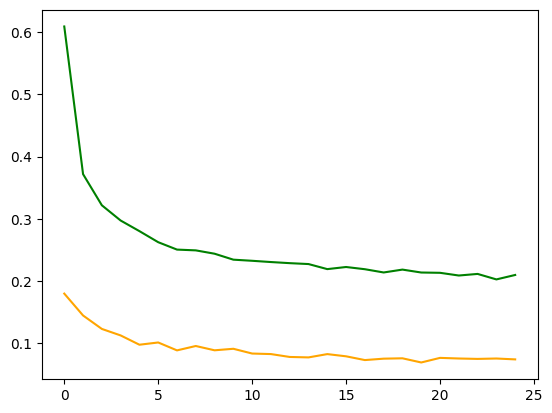

In [33]:
plt.plot(hist.history['loss'] , c = 'green')
plt.plot(hist.history['val_loss'] , c = 'orange')

In [34]:
nn.evaluate(x_train1  , y_train1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9789 - loss: 0.0679


[0.06855089217424393, 0.9784333109855652]

In [35]:
nn.evaluate(x_test1 , y_test1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9707 - loss: 0.0935


[0.08030296117067337, 0.9751999974250793]

In [36]:
#  Evaluation
# training evaluation
train_pred  =  nn.predict(x_train1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [37]:
train_pred

array([[2.83216708e-04, 4.72240616e-03, 1.24601345e-03, ...,
        3.67244764e-04, 2.42464920e-03, 8.26746109e-04],
       [9.99991179e-01, 4.98363746e-11, 5.03736775e-10, ...,
        2.19042747e-07, 1.21066257e-09, 5.97105100e-06],
       [1.46160228e-09, 3.54751660e-06, 3.60602920e-04, ...,
        2.49388304e-05, 3.08631087e-07, 3.12279269e-07],
       ...,
       [2.20087486e-06, 5.20881258e-06, 1.03467426e-06, ...,
        2.37293489e-06, 1.35672881e-05, 1.16593896e-04],
       [1.18284447e-06, 4.21653557e-09, 2.52528508e-07, ...,
        2.46279993e-11, 3.12751513e-06, 1.52869379e-08],
       [5.16674249e-04, 1.32360701e-05, 1.36065617e-04, ...,
        8.76094491e-05, 9.84259009e-01, 1.30914710e-02]], dtype=float32)

In [40]:
y_train_pred =  []
for  i  in  train_pred:
  out =  np.argmax(i)
  y_train_pred.append(out)

In [42]:
import  numpy as  np
print(y_train_pred)

[np.int64(5), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(2), np.int64(1), np.int64(3), np.int64(1), np.int64(4), np.int64(3), np.int64(5), np.int64(3), np.int64(6), np.int64(1), np.int64(7), np.int64(2), np.int64(8), np.int64(6), np.int64(9), np.int64(4), np.int64(0), np.int64(9), np.int64(1), np.int64(3), np.int64(2), np.int64(4), np.int64(3), np.int64(2), np.int64(7), np.int64(3), np.int64(8), np.int64(6), np.int64(9), np.int64(0), np.int64(5), np.int64(6), np.int64(0), np.int64(7), np.int64(6), np.int64(1), np.int64(8), np.int64(7), np.int64(9), np.int64(3), np.int64(9), np.int64(8), np.int64(5), np.int64(5), np.int64(3), np.int64(3), np.int64(0), np.int64(7), np.int64(4), np.int64(9), np.int64(8), np.int64(0), np.int64(9), np.int64(4), np.int64(1), np.int64(4), np.int64(4), np.int64(6), np.int64(0), np.int64(4), np.int64(5), np.int64(6), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(7), np.int64(1), np.int64(6), np.int64(3), np.int64(0), np.int64(2)

In [43]:
from sklearn.metrics  import classification_report , confusion_matrix

In [45]:
print(classification_report(y_train ,  y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5923
           1       0.98      0.99      0.99      6742
           2       0.97      0.96      0.97      5958
           3       0.98      0.98      0.98      6131
           4       0.99      0.97      0.98      5842
           5       0.98      0.98      0.98      5421
           6       0.98      0.99      0.99      5918
           7       0.96      0.98      0.97      6265
           8       0.99      0.96      0.97      5851
           9       0.96      0.97      0.97      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



In [47]:
cm  =  confusion_matrix(y_train ,  y_train_pred)

<Axes: >

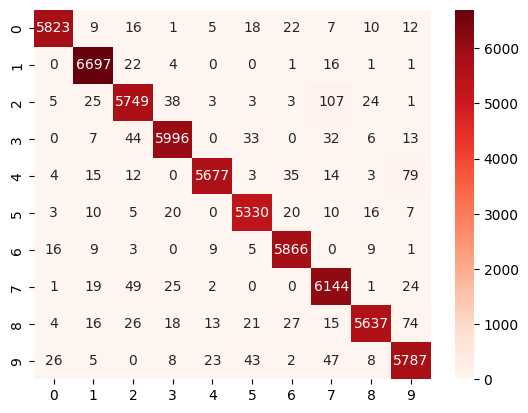

In [52]:
import seaborn as  sns
sns.heatmap(cm  ,  annot  = True  , fmt  =  'd' , xticklabels= range( 10) ,  yticklabels=range(  10 )
,cmap  =  'Reds')

In [53]:
# testing  evaluation
test_pred =  nn.predict(x_test1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [54]:
y_test_pred  =  []
for  i  in  test_pred:
  out =  np.argmax(i)
  y_test_pred.append(out)

In [55]:
print(classification_report(y_test  ,  y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.95      0.97      0.96      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [56]:
cmt  =  confusion_matrix(y_test  ,  y_test_pred)

In [57]:
cmt

array([[ 960,    2,    2,    0,    0,    4,    5,    4,    0,    3],
       [   0, 1130,    2,    2,    0,    0,    1,    0,    0,    0],
       [   4,    4,  992,    5,    1,    0,    2,   24,    0,    0],
       [   0,    1,    3,  990,    0,    4,    0,    9,    2,    1],
       [   1,    3,    2,    0,  957,    0,    7,    0,    0,   12],
       [   3,    4,    0,    3,    0,  878,    1,    2,    1,    0],
       [   5,    6,    1,    0,    5,    1,  937,    0,    3,    0],
       [   1,    6,   14,    7,    0,    1,    0,  998,    0,    1],
       [   0,    1,    6,    5,    1,    0,    1,    3,  943,   14],
       [   3,    0,    0,    2,    8,   16,    1,   10,    2,  967]])

<Axes: >

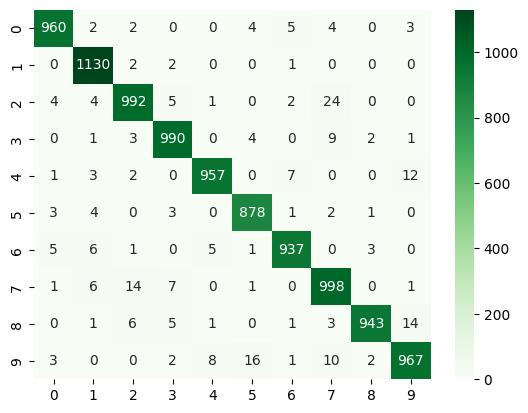

In [58]:
sns.heatmap(cmt  ,  annot  = True  , fmt  =  'd' , xticklabels= range( 10) ,  yticklabels=range(  10 )
,cmap  =  'Greens')

In [113]:
#  unseen  image
path  =  '/content/Example_7 (1).jpg'
import cv2
im  =  cv2.imread(path ,  cv2.IMREAD_GRAYSCALE)

In [114]:
im

array([[255, 253, 255, 251, 255, 255, 252, 255, 255, 253, 252, 254, 255,
        255, 255, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 253, 255, 255, 254, 252, 255, 250, 255, 251, 255, 255, 248,
        255, 254, 255, 255, 255, 255, 253, 255, 255, 252, 255, 255, 255,
        255, 255],
       [251, 255, 253, 251, 255, 254, 254, 255, 254, 255, 250, 255, 255,
        255, 252, 255, 254, 248, 255, 255, 254, 252, 255, 255, 255, 255,
        255, 255],
       [255, 255, 249, 183,  34,   0,   0,  30, 153, 255, 253, 254, 255,
        247, 255, 253, 255, 255, 255, 255, 254, 253, 255, 251, 255, 255,
        255, 255],
       [249, 255, 255,  31,   2,   2,   0,   3,   0,   2,   2,   1,   0,
          8,   0,   2,   0,  36, 156, 255, 255, 250, 255, 255, 255, 255,
        255, 255],
       [255, 252, 253, 135,   0,   0,   0,   0,   2,   0,   0,   5,   1,
          1,   0,   5,   5,   0,   5,  35, 134, 255, 254, 255, 255, 255,
        255, 255],
       [255, 254, 254, 255, 250, 255, 250,  93,   1,   0,   1,   2,   0,
          2,   1,   0,   1,   2,   0,   0,   0, 255, 255, 248, 255, 255,
        255, 255],
       [255, 255, 255, 251, 255, 252, 250, 255, 252, 255, 252, 251, 255,
        253, 255, 253, 133,   0,   1,   2,  77, 255, 247, 255, 255, 255,
        255, 255],
       [255, 253, 255, 254, 251, 255, 254, 254, 255, 251, 253, 255, 250,
        253, 255, 255, 253,   3,   4,   1, 246, 251, 255, 255, 255, 255,
        255, 255],
       [251, 255, 254, 255, 255, 248, 251, 255, 254, 253, 255, 253, 255,
        253, 252, 253, 128,   0,   0,   3, 253, 255, 251, 254, 255, 255,
        255, 255],
       [255, 255, 249, 250, 253, 255, 253, 255, 252, 255, 249, 253, 255,
        254, 255, 152,   1,   1,   3,  92, 251, 255, 255, 251, 255, 255,
        255, 255],
       [251, 255, 253, 255, 255, 253, 254, 253, 253, 254, 255, 254, 251,
        255, 252,  21,   0,   0,  71, 245, 254, 252, 255, 255, 255, 255,
        255, 255],
       [254, 253, 255, 251, 255, 253, 186,  65, 156, 251, 255, 253, 255,
        253, 150,   3,   0,   9, 240, 252, 255, 255, 251, 255, 255, 255,
        255, 255],
       [252, 255, 250, 255, 255, 255,  29,   2,   0,   1,   1,   0,   0,
          1,   0,   0,   2,  86, 255, 255, 253, 252, 255, 255, 255, 255,
        255, 255],
       [253, 254, 255, 253, 252, 255, 114,   0,   5,   0,   0,   4,   2,
          0,   1,   0,   0,   3,  35, 157, 254, 255, 252, 254, 255, 255,
        255, 255],
       [255, 252, 255, 254, 255, 249, 249,  94,   0,   2,   2,   0,   0,
          0,   2,   1,   2,   0,   0,   8, 255, 251, 254, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 253, 255, 252, 251, 255,
         25,   3,   0,   5,   0,   4, 104, 254, 255, 251, 254, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 255, 247, 255,
          0,   1,   2, 246, 255, 255, 253, 255, 249, 255, 254, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 251, 255, 254, 255, 148,
          4,   3,   0, 255, 254, 254, 255, 250, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 254, 248,  24,
          3,   0,  86, 251, 254, 255, 251, 255, 254, 247, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 253, 155,   5,
          0,   3, 245, 255, 255, 255, 251, 255, 254, 255, 254, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  21,   3,
          1,  87, 255, 254, 254, 252, 255, 255, 249, 252, 251, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 255,   0,   0,
          5, 242, 255, 248, 255, 254, 251, 253, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 148,   2,   1,
          0, 255, 253, 255, 254, 255, 251, 255, 255, 253, 254, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

In [115]:
im  =  im/255

In [116]:
#  convert in  3d array
#  as  input shape  is  28 x28x1
im  =  np.array([im])

In [117]:
im.shape

(1, 28, 28)

In [121]:
pred  =  nn.predict(im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [124]:
pred

array([[6.1597246e-01, 2.2196672e-04, 2.1412447e-02, 3.3422646e-03,
        1.7042556e-03, 9.9220350e-03, 1.0723154e-01, 1.7823276e-04,
        2.2323069e-01, 1.6784128e-02]], dtype=float32)

In [122]:
pred1  =  np.argmax(pred)

In [123]:
pred1

np.int64(0)